# Were catholic areas of Germany less likely to support the Nazi party?



This project intends to investigate if Catholic areas of Germany were less likely to support the Nazi party in the elections held in November 1932.

First off there will be an exploratory data analysis on the data set, this should allow us to see the descriptive statistics and visualise the variables we are going to run a regression on. 

> pct_catholic, religiosity, literacy_rate, pct_other_rel

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
sns.set()

df = pd.read_csv('reichstag.csv')

## Explorative data analysis

In [9]:
df.describe(include = 'all')

,nsdap_share,pct_catholic,pct_jewish,pct_other_rel,pct_women,log_population,female_workforce,urban_county,unemp_white_collar,unemp_blue_collar,unemp_domestic,industry_manufacturing,industry_trade,industry_services,industry_domestic,distance_to_berlin,literacy_rate,bavaria,log_income_per_capita,religiosity
count,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,397.000000,982.000000,982.000000,779.000000
mean,27.768552,36.311918,0.532893,2.144964,47.220188,10.432123,37.813095,0.267821,14.961861,24.939465,10.896228,28.956254,14.157055,7.626701,3.500647,351.496692,90.178857,0.218941,7.412508,0.499358
std,11.462715,37.581153,0.939980,2.723325,13.439535,1.768615,14.213634,0.443049,6.692085,12.167682,6.102439,16.113047,10.117350,6.393117,2.327783,152.821738,9.060698,0.413739,1.938009,0.500321
min,4.313055,0.303951,0.000000,-0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.948739,43.146183,0.000000,0.000000,0.000000
25%,18.491055,3.570963,0.065253,0.311681,50.008022,10.202277,31.806830,0.000000,11.065729,16.157795,7.112497,16.479064,7.221122,3.817740,2.042122,227.693631,88.978836,0.000000,7.723540,0.000000
50%,27.751987,15.526534,0.257111,1.199995,50.734699,10.613480,40.114965,0.000000,15.127087,24.828549,10.471687,27.334899,10.895078,5.511930,2.869380,364.586078,93.272995,0.000000,7.853368,0.000000
75%,35.662932,79.450560,0.662945,2.865107,51.620101,11.089145,47.427110,1.000000,19.139761,33.539938,14.060931,39.769351,18.456141,9.245041,4.527771,476.610259,95.771164,0.000000,8.053254,1.000000
max,68.578972,99.758736,12.982320,19.699999,59.929920,13.891662,62.507015,1.000000,35.757217,59.834499,39.898689,77.966705,55.287445,63.493351,23.111143,683.165129,99.331673,1.000000,9.518550,1.000000


 ####  Visualisation

Visualising key variables that will be used in the regression.



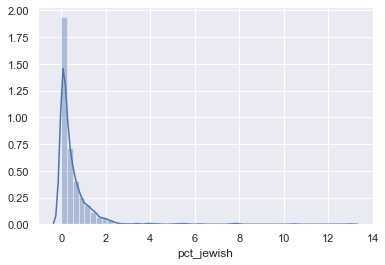

In [27]:
sns.distplot(df['pct_jewish'])

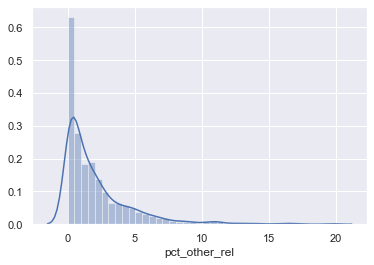

In [31]:
sns.distplot(df['pct_other_rel'])

If pct_jewish and pct_other_rel is to be used in any of the analysis or predictions, the clear outliers in the variable will have to be removed.

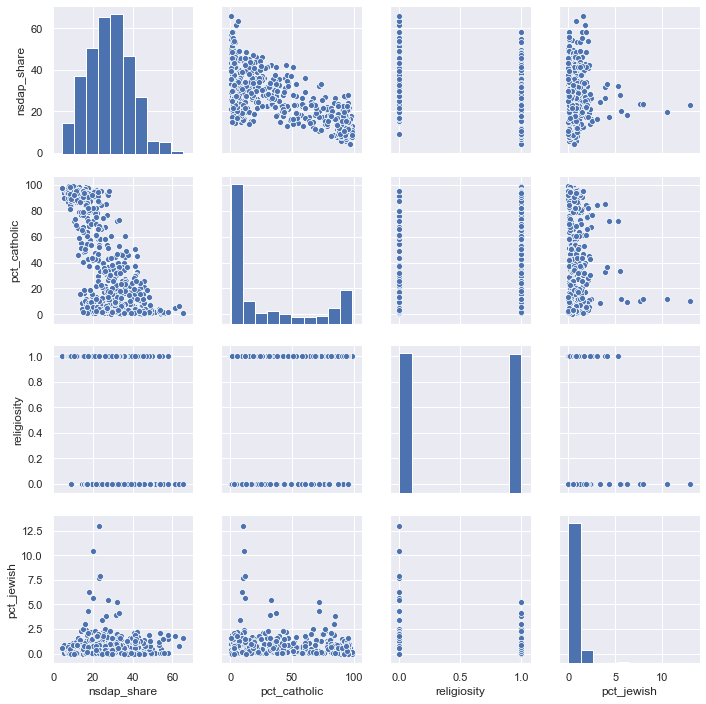

In [20]:
XDF = df[['nsdap_share','pct_catholic','religiosity','pct_jewish']]
XDF = XDF.dropna()
sns.pairplot(XDF)

#### Dealing with missing values (clean dataframe)

In [6]:
dfLR = df[['nsdap_share' , 'pct_catholic']]
dfLR = dfLR.dropna()

#### Solving linear regression

In [44]:
yLR = dfLR['nsdap_share']
xLR = dfLR['pct_catholic']
XLR = sm.add_constant(xLR)
rLR = sm.OLS(yLR , XLR).fit()

print( 'slope:', rLR.params[1])
print( 'rsqrd:', rLR.rsquared)
print( 'pvalue:', np.around(rLR.pvalues[1]))

slope: -0.21340595141621854
rsqrd: 0.48952882249530627
pvalue: 0.0


#### Plotting regression fit

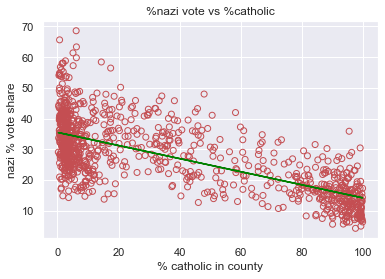

In [13]:
xeq = dfLR['pct_catholic']
yeq = rLR.params[1] * xeq + rLR.params[0]
b, meq = polyfit(xeq, yeq, 1)


plt.scatter(dfLR['pct_catholic'], dfLR['nsdap_share'],facecolors = 'none', edgecolors = 'r')
plt.xlabel( '% catholic in county')
plt.ylabel( 'nazi % vote share')
plt.title( '%nazi vote vs %catholic')
plt.plot(xeq, b+ meq*xeq, c= 'green')

As our independent variable increases the dependent variable decreases outlined by the -0.2134 coefficient. This seems to suggest that if a county is 'more'  catholic then it is less likely to support the Nazi party. The coefficient also has a P-value lower than 0.05 showing that pct_catholic is a significant variable.

An r-squared value of 0.490 implies that this regression accounts for almost half of the variability. For a topic so complex, a regression that explains almost half of the variability is very high.  

## Multiple Linear Regression

#### Multiple Linear Regression prep



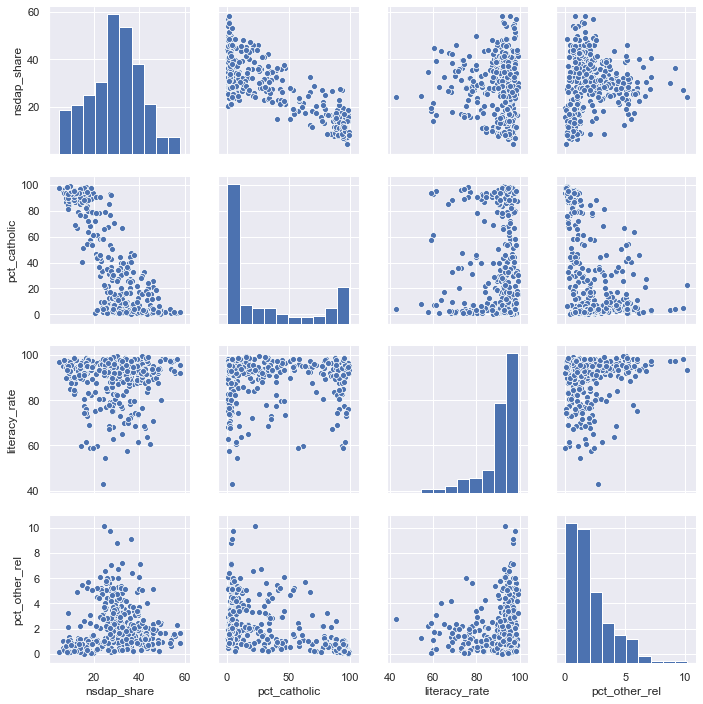

In [37]:
XDF = df[['nsdap_share' , 'pct_catholic', 'literacy_rate', 'pct_other_rel']]
XDF = XDF.dropna()
sns.pairplot(XDF)

#### The actual MLR 

In [35]:
dfi = df[['nsdap_share' , 'pct_catholic', 'literacy_rate', 'pct_other_rel']]
dfi = dfi.dropna()

yi = dfi['nsdap_share']
xi = dfi[['pct_catholic', 'literacy_rate', 'pct_other_rel']]

Xi = sm.add_constant(xi)
resultsi = sm.OLS(yi, Xi).fit()
resultsi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            nsdap_share   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     260.5
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           4.82e-93
Time:                        18:27:20   Log-Likelihood:                -1311.0
No. Observations:                 397   AIC:                             2630.
Df Residuals:                     393   BIC:                             2646.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            38.1480      3.346     11.400      0.000      31.569      44.727
pct_catholic     -0.2869      0.010    -27.627      0.000      -0.307      -0.266
literacy_rate     0.0378      0.037      1.016      0.310      -0.035       0.111
pct_other_rel    -1.6313      0.210     -7.766      0.000      -2.044      -1.218
==============================================================================
Omnibus:                       10.624   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.121
Skew:                           0.406   Prob(JB):                      0.00385
Kurtosis:                       2.883   Cond. No.                         972.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""